In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('font', **{'family': 'Libertine'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=16)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [3]:
df_tsa_plot = pd.read_csv("rosa_results/oscillator_tsa.csv")
df_csa_plot = pd.read_csv("rosa_results/oscillator_csa.csv")
df_csa_plot

,variable,sample,HSIC,R2HSIC,pvalue_permutation
0,$m_p$,Subset 1,0.001014,0.015179,0.000000
1,$m_s$,Subset 1,0.001936,0.029723,0.000000
2,$k_p$,Subset 1,0.004554,0.070986,0.000000
3,$k_s$,Subset 1,0.003210,0.049113,0.000000
4,$\zeta_p$,Subset 1,0.000421,0.006692,0.000000
5,$\zeta_s$,Subset 1,0.000405,0.006730,0.000000
6,$F_s$,Subset 1,0.024350,0.377286,0.000000
7,$S_0$,Subset 1,0.000108,0.001627,0.000000
8,$m_p$,Subset 2,0.000291,0.004254,0.000000
9,$m_s$,Subset 2,0.000717,0.010850,0.000000


In [4]:
def draw_indices(df, column, ylabel, savefile=None): 
    nb_subset = len(df["sample"].unique())
    xplot = np.arange(nb_subset)
    fig = plt.figure(figsize=(5, 4))
    for i, var in enumerate(df["variable"].unique()):
        sub_df = df[df["variable"]==var]
        plt.plot(xplot, sub_df[column].values, color="C{}".format(i), marker="o", label=var)
    plt.yscale("log")
    plt.grid()
    plt.xlabel("BANCS samples ($N=10^4$)")
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.4, 1.), loc='upper right', ncol=1)
    plt.xticks(xplot, [f"S{i+1}" for i in xplot])
    if savefile is not None: 
        plt.savefig(savefile, dpi=300, bbox_inches='tight')
    return fig

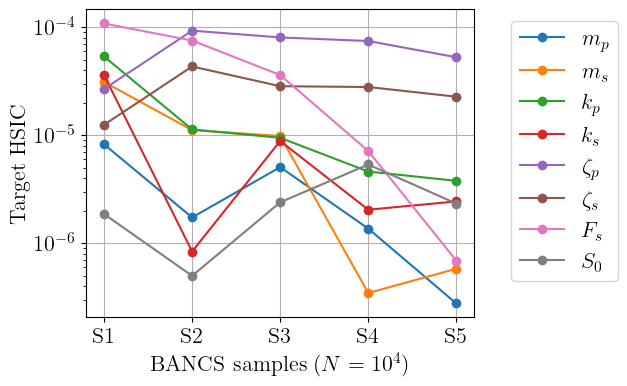

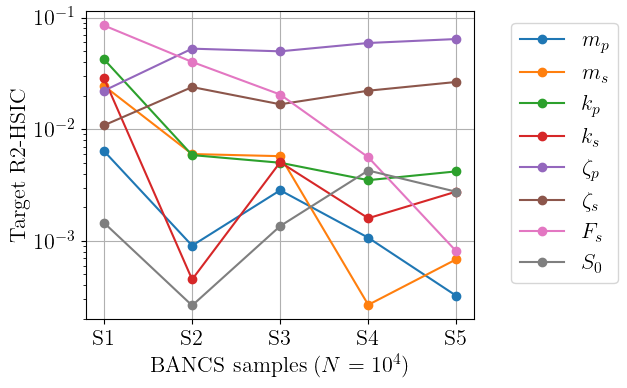

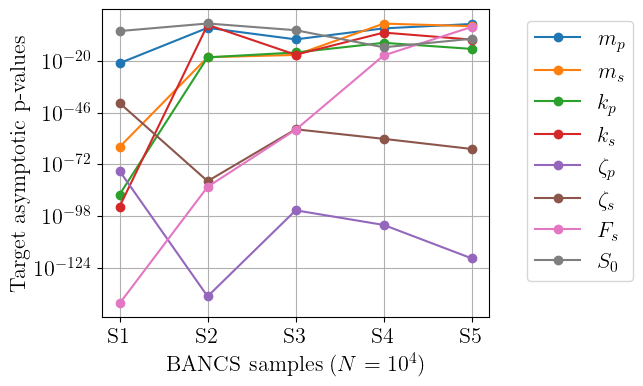

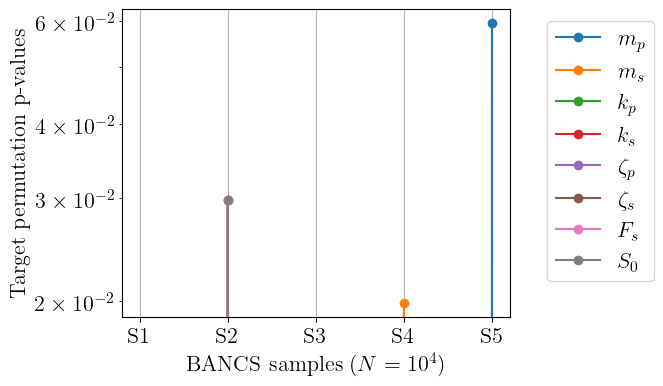

In [5]:
## TSA figures ##
# HSIC
draw_indices(df_tsa_plot, "HSIC", "Target HSIC", "rosa_figures/oscillator_THSIC.png")
# R2HSIC
draw_indices(df_tsa_plot, "R2HSIC", "Target R2-HSIC", "rosa_figures/oscillator_TR2HSIC.png")
# P-values asymptotic
draw_indices(df_tsa_plot, "pvalue_asymptotic", "Target asymptotic p-values", "rosa_figures/oscillator_Tpvalue_asymptotic.png")
# P-values permutation
draw_indices(df_tsa_plot, "pvalue_permutation", "Target permutation p-values", "rosa_figures/oscillator_Tpvalue_permutation.png");

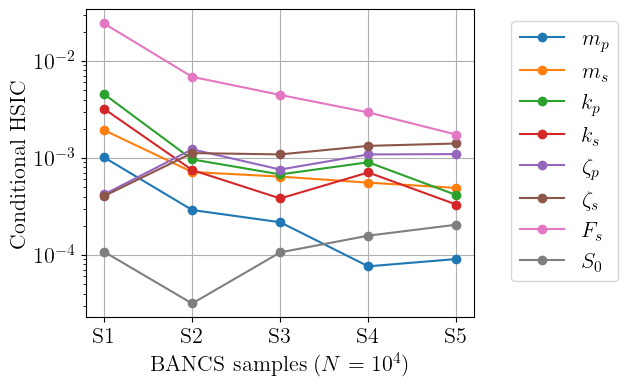

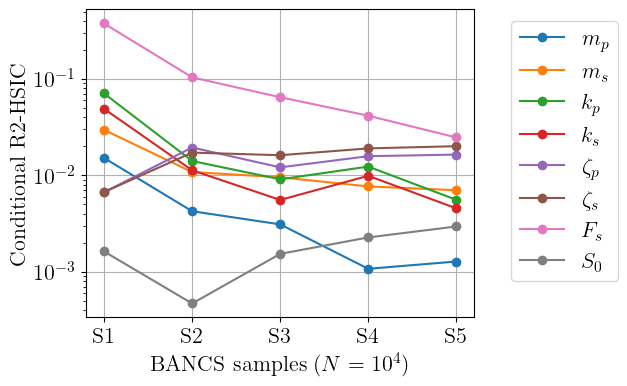

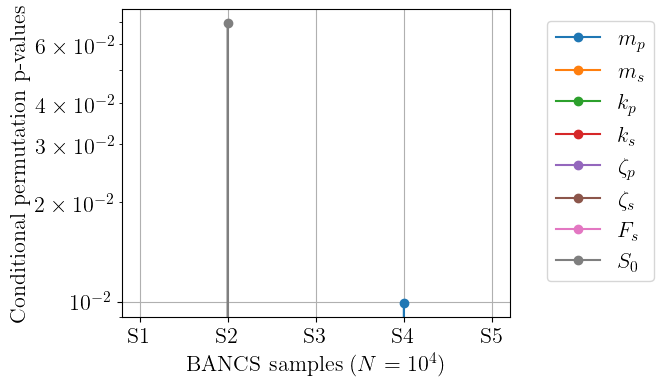

In [6]:
## CSA figures ##
# HSIC
draw_indices(df_csa_plot, "HSIC", "Conditional HSIC", "rosa_figures/oscillator_CHSIC.png")
# R2HSIC
draw_indices(df_csa_plot, "R2HSIC", "Conditional R2-HSIC", "rosa_figures/oscillator_CR2HSIC.png")
# P-values permutation
draw_indices(df_csa_plot, "pvalue_permutation", "Conditional permutation p-values", "rosa_figures/oscillator_Cpvalue_permutation.png");